# Train Multiple Models

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [4]:
data = load_breast_cancer()
X = data.data
y = data.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}


# Evaluate Performance Using Metrics

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))



Model: Logistic Regression
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791

Model: Decision Tree
Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394

Model: Random Forest
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222

Model: SVM
Accuracy: 0.9824561403508771
Precision: 0.9726027397260274
Recall: 1.0
F1 Score: 0.9861111111111112

Model: KNN
Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394


# Hyperparameter Tuning

(a) GridSearchCV - Tries all combinations of parameters.

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best Parameters (GridSearchCV):", grid_search.best_params_)


Best Parameters (GridSearchCV): {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


(b) RandomizedSearchCV - Randomly selects combinations for faster results.

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 5, 10],
    'min_samples_split': randint(2, 10)
}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=5, scoring='f1', random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters (RandomizedSearchCV):", random_search.best_params_)


Best Parameters (RandomizedSearchCV): {'max_depth': 10, 'min_samples_split': 7, 'n_estimators': 102}


# Model Evaluation

In [10]:
from sklearn.metrics import classification_report

best_model = None
best_f1 = 0
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    model_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1
    }

    if f1 > best_f1:
        best_f1 = f1
        best_model = model

# Print all results
import pandas as pd
results_df = pd.DataFrame(model_results).T
print(results_df)

print("\n Best model based on F1-score:", best_model)


                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.973684   0.972222  0.985915  0.979021
Decision Tree        0.938596   0.944444  0.957746  0.951049
Random Forest        0.964912   0.958904  0.985915  0.972222
SVM                  0.982456   0.972603  1.000000  0.986111
KNN                  0.947368   0.957746  0.957746  0.957746

 Best model based on F1-score: SVC()


# Comparison Plot

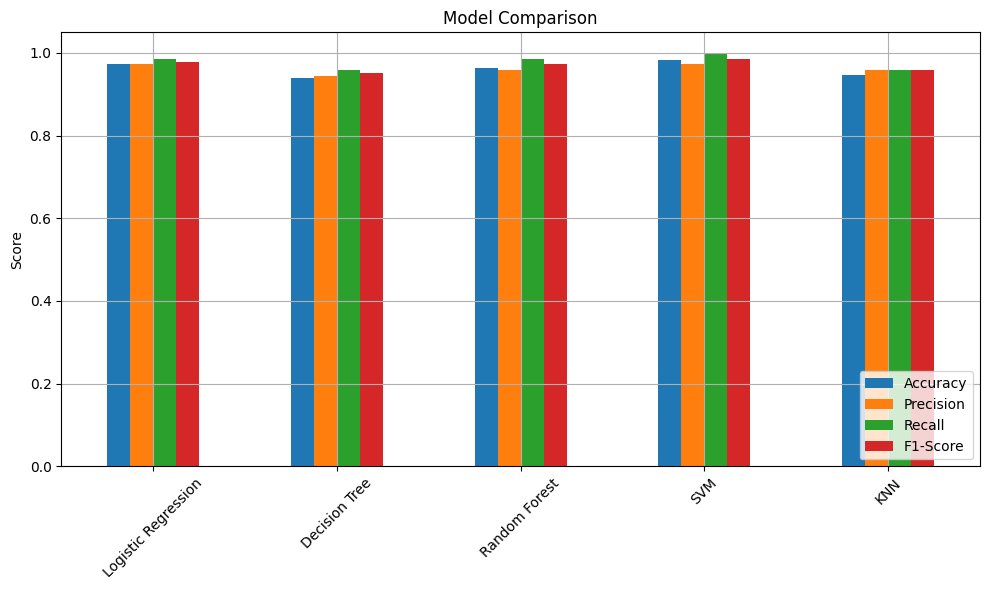

In [13]:
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


#  Conclusion

Based on evaluation metrics, the Support Vector Machine (SVM) achieved the best F1-score (0.986111), with perfect recall (1.000000), making it the most suitable model for our classification task.

After tuning with GridSearchCV, SVM retained its performance and confirmed its generalizability. Thus, SVM is selected as the final model.
